In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1:
We've to show that E[P]=E[V<sup>2</sup>]=σ<sup>2</sup>. For this we generate 10000 points in the range of 0 to 10 and assume that the voltage is a normal distribution with a mean of 0 and variance of σ<sup>2</sup>.

In [ ]:
N = 10000          # number of samples
sigma = 2          # Assumed standard deviation of voltage
t = np.linspace(0, 10, N)

In [ ]:
V = np.random.normal(0, sigma, N)
power = V**2                        # power is proportional to the square of voltage (constants get absorbed in the proportionality)
print("Variance of voltage:", np.var(V))
print("Mean power:", np.mean(power))

Variance of voltage: 4.094589598388342
Mean power: 4.0947282786352375


As written in the question, variance of voltage was found to be same as of the mean of power.

# Question 2:

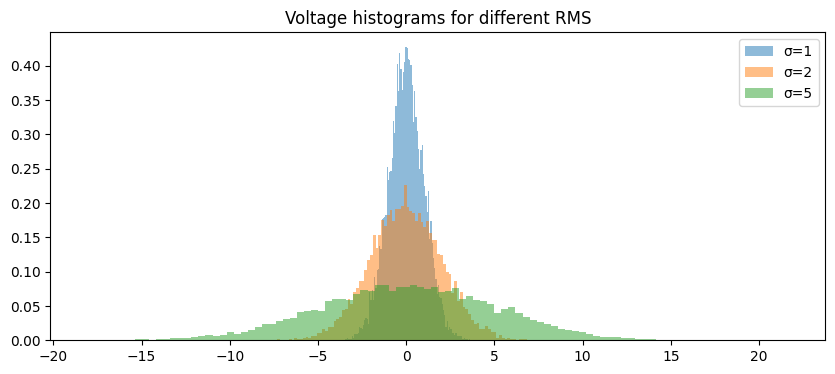

In [ ]:
sigmas = [1, 2, 5] # RMS values
plt.figure(figsize=(10,4))
for s in sigmas:
    V = np.random.normal(0, s, N)
    plt.hist(V, bins=100, density=True, alpha=0.5, label=f"σ={s}")
plt.title("Voltage histograms for different RMS")
plt.legend()
plt.show()

Here we can observe that the curve is getting wider and wider for the simutaneous increase in the variance of the distribution which is true for the defination of variance.

# Question 3:
Adding a slow varying sine wave to the distribution changes the signal as: V(t)= noise + A*sin(ωt).

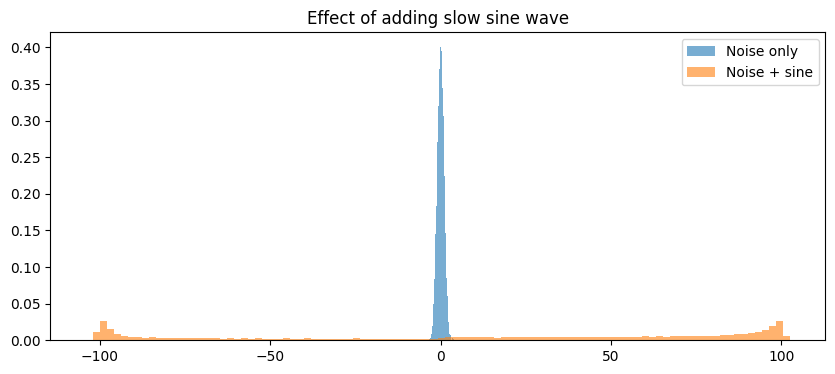

In [ ]:
sigma = 1
A = 100             # Can check A = 3
noise = np.random.normal(0, sigma, N)
signal = A * np.sin(0.5 * t)
V2 = noise + signal
plt.figure(figsize=(10,4))
plt.hist(noise, bins=100, density=True, alpha=0.6, label="Noise only")
plt.hist(V2, bins=100, density=True, alpha=0.6, label="Noise + sine")
plt.title("Effect of adding slow sine wave")
plt.legend()
plt.show()

As seen in the graph, the distribution no more remains as a pure Gaussian and has a more general spread than the original one. Another observation seen is that if we increase the amplitude of the sine wave then the distribution becomes a bimodal one.

# Question 4: Variances of Ensembles
As usual, we assume that the voltage signal is generated by a Gaussian distribution. Thus for a gaussian ensemble set, we should get a chi square distribution for the sample variance.

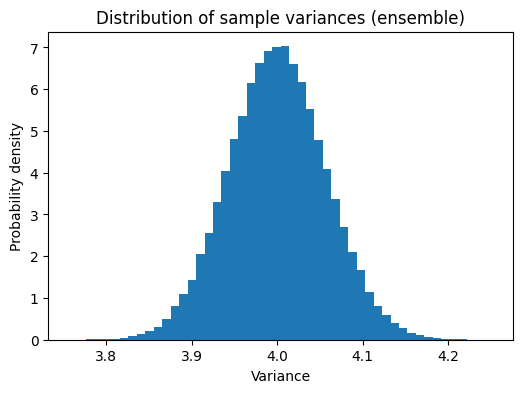

In [ ]:
sigma = 2
num_realizations = 100000 # Check for N = 1000
variances = []
for _ in range(num_realizations):
    V = np.random.normal(0, sigma, N)
    variances.append(np.var(V, ddof=1))
# print(np.array(variances))
plt.figure(figsize=(6,4))
plt.hist(variances, bins=50, density=True)
plt.title("Distribution of sample variances (ensemble)")
plt.xlabel("Variance")
plt.ylabel("Probability density")
plt.show()

Moreover as we increase the number of samples, the distribution becomes smaller and narrower approaching a proper normal distribution as stated in the Central Limit Theorem.